In [1]:
from meteostat import Daily, Stations, Hourly
from geopy.geocoders import Nominatim

import datetime
import matplotlib.pyplot as plt

In [2]:
geolocator = Nominatim(timeout=10, user_agent="PDS")
location = geolocator.geocode('Cardiff')
lat, long = location.latitude, location.longitude

In [3]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 31)

In [4]:
stations = Stations()
stations = stations.nearby(lat, long)
stations = stations.inventory('hourly', (start, end))
station = stations.fetch(1)
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
03715,Cardiff-Wales Airport,GB,WLS,03715,EGFF,51.4,-3.35,67.0,Europe/London,1973-01-01,2022-10-01,1973-01-01,2022-04-25,1971-01-01,2022-01-01,14919.528717


In [5]:
data = Hourly(station, start, end)
data = data.fetch()
data = data.reset_index(level=0)
data.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2020-01-01 00:00:00,7.0,5.0,87.0,NaN,NaN,72.0,7.4,16.7,1029.0,NaN,4.0
1,2020-01-01 01:00:00,6.0,5.0,93.0,NaN,NaN,130.0,20.5,13.0,1029.0,NaN,4.0
2,2020-01-01 02:00:00,6.0,4.0,87.0,NaN,NaN,120.0,14.8,14.8,1028.0,NaN,4.0
3,2020-01-01 03:00:00,6.0,4.0,87.0,NaN,NaN,130.0,9.4,14.8,1028.0,NaN,4.0
4,2020-01-01 04:00:00,4.0,3.0,93.0,NaN,NaN,100.0,5.4,14.8,1028.0,NaN,4.0


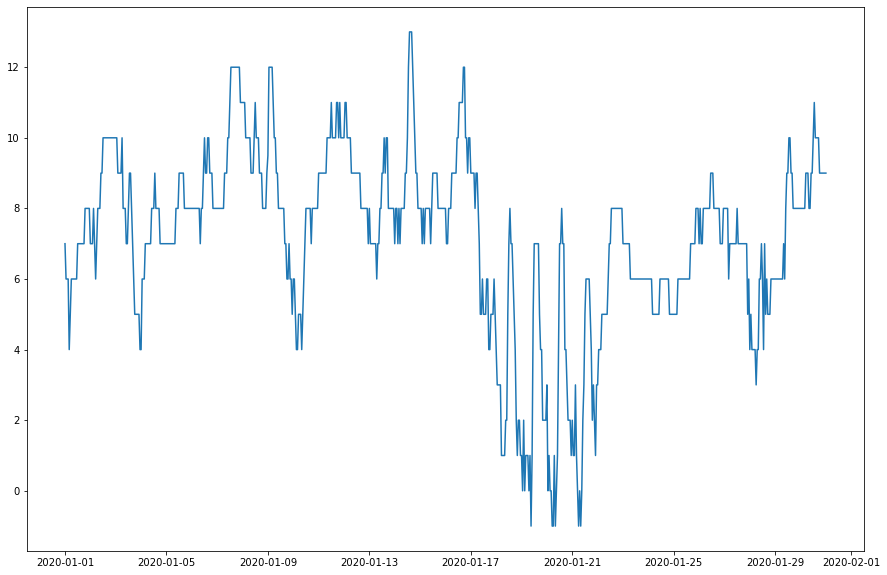

In [6]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data["time"], data["temp"])